# [In Class] Homework #1
This problem set deals with matrial from the first four lectures.  
You may reference any materials, but make sure if you directly copy code, that you provide a link to the source in the mark up.
Likewise, if you find a really helpful website, you should add that link as well.

Work from this notebook and submit a copy of this notebook via canvas.  Include any additional scripts or files needed to reproduce

## Problem 1.  
* Load the Pitt_Cathedral.jpg file from the Data folder as a color image
* Convert the image colors to display using the imshow() command 
* then Convert the image to Grayscale and display again

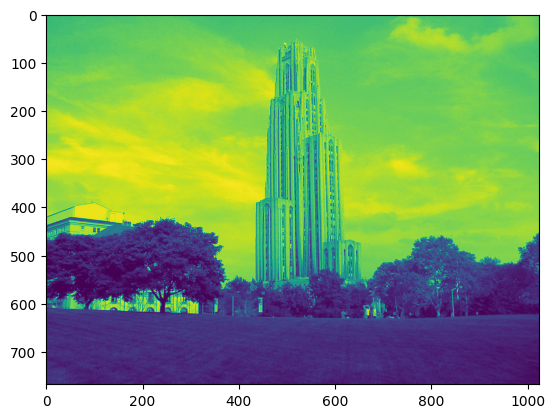

In [4]:

import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Read in the image from the Data folder
image = cv2.imread('Data/Pitt_Cathedral.jpg', cv2.IMREAD_COLOR)

# Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray)



## Problem 2.
* Annotate the Cathedral image from problem 1 with the slogan "Hail to Pitt" placed in the image
* In a different font and color, add your name in text to the same image
* Crop the image around the Cathedral and display 

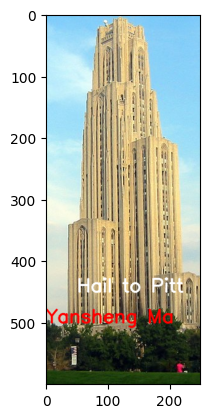

In [18]:
import cv2
import matplotlib.pyplot as plt

# Load the image from the Data folder
image = cv2.imread('Data/Pitt_Cathedral.jpg', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image_rgb, 'Hail to Pitt', (450, 500), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
font = cv2.FONT_ITALIC# Add your name in a different font and color
cv2.putText(image_rgb, 'Yansheng Ma', (400, 550), font, 1, (255, 0, 0), 2, cv2.LINE_AA)

cropped_image = image_rgb[50:650, 400:650]

plt.imshow(cropped_image)

## Problem 3.
* Create a binary mask seperating the blue sky by thresholding
* Using this mask, change (just the) sky to be a deeper blue 

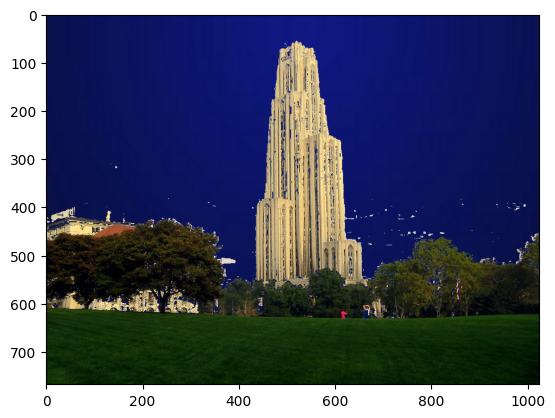

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the original image
image = cv2.imread('Data/Pitt_Cathedral.jpg')

# Read the deep blue background image (solid color)
deepblue_color = cv2.imread('Data/deepblue.png')

# Convert the deep blue image to RGB
deepblue_color_rgb = cv2.cvtColor(deepblue_color, cv2.COLOR_BGR2RGB)

# Ensure the background image is the same size as the original image
deepblue_color_resized = cv2.resize(deepblue_color, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_AREA)

# Create a deep blue background image
deepblue_background = np.zeros_like(image)
deepblue_background[:] = deepblue_color_resized

# Convert the image from BGR to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the blue range
lower_blue = np.array([25, 10, 100])
upper_blue = np.array([130, 255, 255])

# Create a binary mask
mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Apply the deep blue background to the masked region
sky_replacement = cv2.bitwise_and(deepblue_background, deepblue_background, mask=mask)

# Replace the sky region in the original image with the deep blue background
result_image = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask))  # Keep the non-sky region
result_image = cv2.add(result_image, sky_replacement)  # Replace the sky region with deep blue

# Convert the result back to RGB
result_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

# Display the result
plt.imshow(result_rgb)
plt.show()


## Problem 4.
[ECE 1390]
* Write a function to preform a median filter operation using a moving 3 x 3 kernel.  The median filter should compute the median value from the 9 pixels in the kernel and replace the value at the center.    

[ECE 2390]
* Write a function to preform a median filter operation using an arbitrary kernel (taken as a second argument).  The median filter should compute the median value from the pixels in the kernel and replace the value at the kernel anchor (center).    



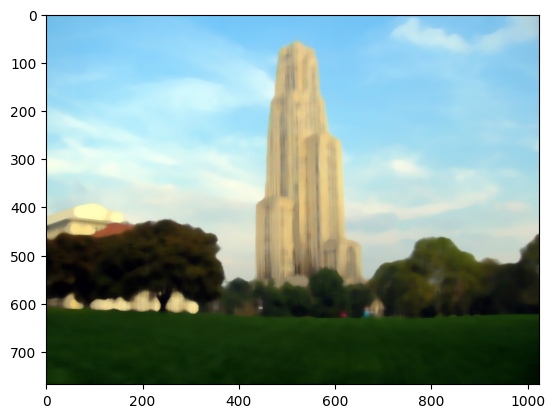

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def median_filter(image, kernel_size):
    # Ensure the kernel size is an odd number
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be an odd number.")
    
    pad_size = kernel_size // 2
    
    # Pad the image edges to handle border pixels
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='edge')
    
    # Initialize the output image
    filtered_image = np.zeros_like(image)
    
    # Apply median filtering
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the region of interest (ROI)
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            # Compute the median
            median_value = np.median(region)
            # Assign the median value to the central pixel
            filtered_image[i, j] = median_value
    
    return filtered_image

# Read the image
image = cv2.imread('Data/Pitt_Cathedral.jpg', cv2.IMREAD_COLOR)
channels = cv2.split(image)

kernel_size = 15

filtered_channels = []
for channel in channels:
    filtered_channel = median_filter(channel, kernel_size)
    filtered_channels.append(filtered_channel)
    
# Apply median filtering
filtered_image = cv2.merge(filtered_channels)
result = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB)

# Display the result
plt.imshow(result)
plt.show()


## Problem 5 [ECE 2690 students]
* Using the Haar wavelet, compress the color image by 25% removing only the high/high-pass component 

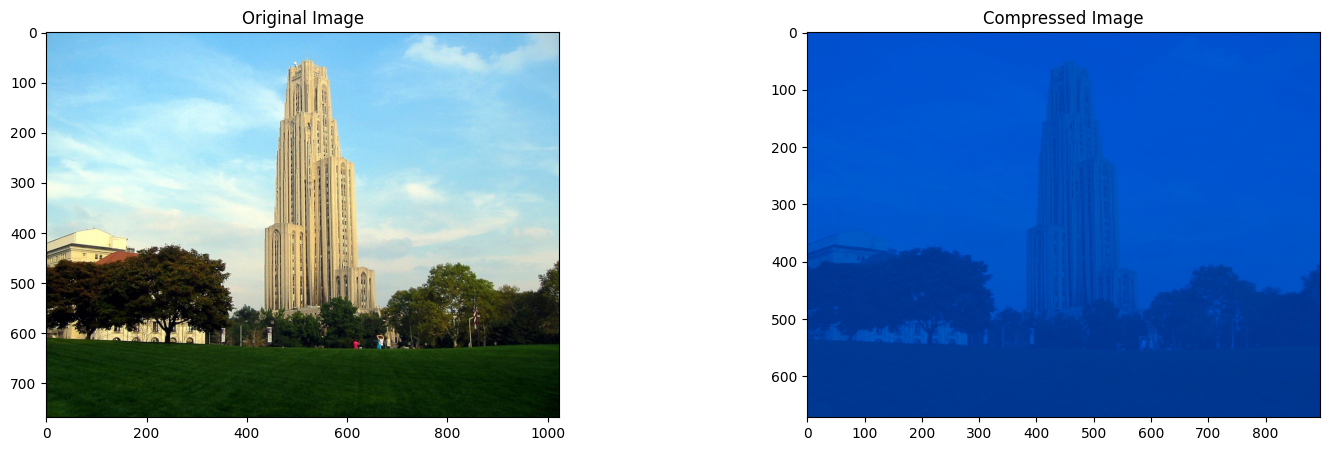

Original Image Size: 2304.00 KB
Compressed Image Size: 1764.00 KB


In [140]:
# import os
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import math


# def upsample(X, ratio=1.75, axis=0):
#     # 计算要保留的索引
#     new_size = int(np.floor(X.shape[axis] * ratio))
#     indices = np.linspace(0, X.shape[axis] - 1, new_size, dtype=int)
    
#     if axis == 0:
#         X = X[indices, :]
#     else:
#         X = X[:, indices]
        
#     return X

# def downsample(X, axis=0):
#     if axis == 0:
#         X = X[0::2, :]
#     else:
#         X = X[:, 0::2]
#     return X

# def conv2down(X, h1, h2):
#     X = cv2.filter2D(X, -1, h1)
#     X = downsample(X, axis=0)
#     X = cv2.filter2D(X, -1, h2.transpose())
#     return downsample(X, axis=1)

# def conv2up(X, h1, h2):
#     X = upsample(X, axis=1)
#     X = cv2.filter2D(X, -1, h1.transpose())
#     X = upsample(X, axis=0)
#     return cv2.filter2D(X, -1, h2)

# def image_size(image):
#     # 计算图像内存占用大小
#     return image.nbytes

# # 读取彩色图像
# image_path = os.path.relpath('Data/Pitt_Cathedral.jpg')
# img_color = cv2.imread(image_path)
# img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)  # 转换为RGB

# # 转换为Lab色彩空间
# img_lab = cv2.cvtColor(img_color, cv2.COLOR_RGB2Lab)

# # Haar小波编码低通和高通滤波器
# haar_EL = 0.5 / math.sqrt(2.0) * np.array([[1.0], [1.0]])
# haar_EH = 0.5 / math.sqrt(2.0) * np.array([[-1.0], [1.0]])

# # 分离Lab通道
# L, a, b = cv2.split(img_lab)

# compressed_channels = []

# for channel in [L, a, b]:
#     # 对每个通道应用Haar小波变换
#     img_LL = conv2down(channel, haar_EL, haar_EL)
#     img_LH = conv2down(channel, haar_EL, haar_EH)
#     img_HL = conv2down(channel, haar_EH, haar_EL)
#     img_HH = conv2down(channel, haar_EH, haar_EH)
    
#     # 仅保留低通部分，移除高通部分
#     compressed_LL = img_LL
#     compressed_LH = img_LH
#     compressed_HL = img_HL
#     compressed_HH = np.zeros_like(img_HH)
    
#     # 重建压缩后的图像
#     img1 = conv2up(compressed_LL, haar_EL, haar_EL)
#     img2 = conv2up(compressed_LH, haar_EH, haar_EL)
#     img3 = conv2up(compressed_HL, haar_EL, haar_EH)
#     img4 = conv2up(compressed_HH, haar_EH, haar_EH)
   
#     compressed_channel = img1 + img2 + img3 + img4
#     compressed_channels.append(compressed_channel)

# # 合并压缩后的Lab通道
# compressed_lab_img = cv2.merge(compressed_channels)

# # 转换回RGB色彩空间
# compressed_img = cv2.cvtColor(compressed_lab_img, cv2.COLOR_Lab2RGB)

# # 确保像素值在[0, 255]范围内
# compressed_img = np.clip(compressed_img, 0, 255).astype(np.uint8)

# # 显示图像
# plt.figure(figsize=[18, 5])
# plt.subplot(121); plt.imshow(img_color); plt.title("Original Image")
# plt.subplot(122); plt.imshow(compressed_img); plt.title("Compressed Image")
# plt.show()

# original_size = image_size(img_color)
# compressed_size = image_size(compressed_img)
# print(f"Original Image Size: {original_size / 1024:.2f} KB")
# print(f"Compressed Image Size: {compressed_size / 1024:.2f} KB")


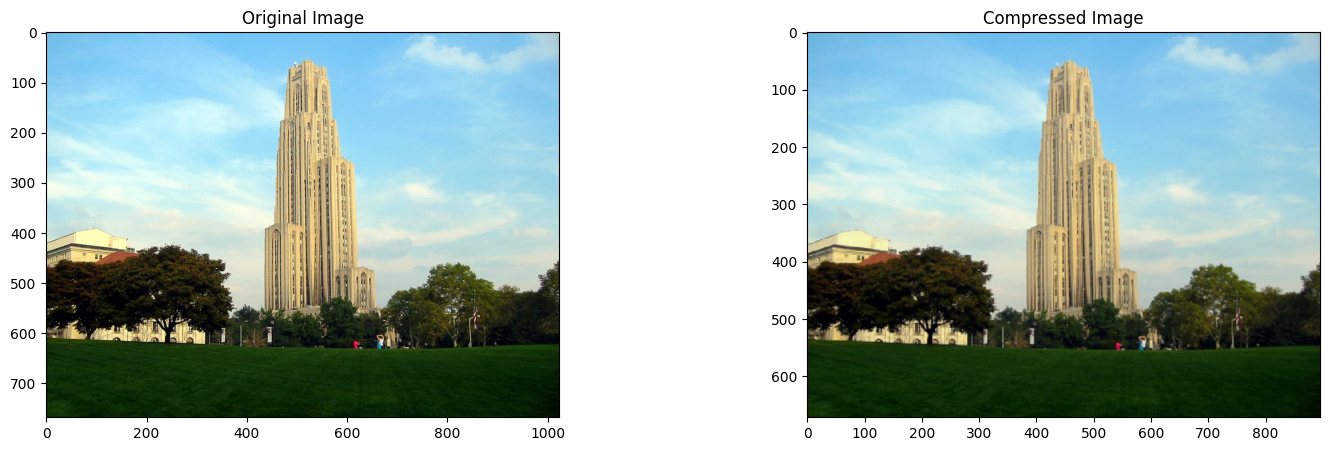

Original Image Size: 2304.00 KB
Compressed Image Size: 1764.00 KB


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

def upsample(X, ratio=1.75, axis=0):
    # Calculate the new size after upsampling
    new_size = int(np.floor(X.shape[axis] * ratio))
    indices = np.linspace(0, X.shape[axis] - 1, new_size, dtype=int)
    
    # Upsample along the specified axis
    if axis == 0:
        X = X[indices, :]
    else:
        X = X[:, indices]
        
    return X

def downsample(X, axis=0):
    # Downsample the input matrix along the specified axis
    if axis == 0:
        X = X[0::2, :]
    else:
        X = X[:, 0::2]
    return X

def conv2down(X, h1, h2):
    # Apply convolution and then downsample
    X = cv2.filter2D(X, -1, h1)
    X = downsample(X, axis=0)
    X = cv2.filter2D(X, -1, h2.transpose())
    return downsample(X, axis=1)

def conv2up(X, h1, h2):
    # Upsample and then apply convolution
    X = upsample(X, axis=1)
    X = cv2.filter2D(X, -1, h1.transpose())
    X = upsample(X, axis=0)
    return cv2.filter2D(X, -1, h2)

def image_size(image):
    # Calculate the memory size occupied by the image
    return image.nbytes

# Read the color image
image_path = os.path.relpath('Data/Pitt_Cathedral.jpg')
img_color = cv2.imread(image_path)
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Low-pass and high-pass filters for Haar wavelet encoding
haar_EL = 0.7 / math.sqrt(2.0) * np.array([[1.0], [1.0]])
haar_EH = 0.5 / math.sqrt(2.0) * np.array([[-1.0], [1.0]])

# Split the color channels
channels = cv2.split(img_color)

compressed_channels = []

for channel in channels:
    # Apply Haar wavelet transform to each color channel
    img_LL = conv2down(channel, haar_EL, haar_EL)
    img_LH = conv2down(channel, haar_EL, haar_EH)
    img_HL = conv2down(channel, haar_EH, haar_EL)
    img_HH = conv2down(channel, haar_EH, haar_EH)
    
    # Keep only the low-pass part, remove the high-pass part
    compressed_LL = img_LL
    compressed_LH = img_LH
    compressed_HL = img_HL
    compressed_HH = np.zeros_like(img_HH)
    
    # Reconstruct the compressed image
    img1 = conv2up(compressed_LL, haar_EL, haar_EL)
    img2 = conv2up(compressed_LH, haar_EH, haar_EL)
    img3 = conv2up(compressed_HL, haar_EL, haar_EH)
    img4 = conv2up(compressed_HH, haar_EH, haar_EH)
   
    compressed_channel = img1 + img2 + img3 + img4
    compressed_channels.append(compressed_channel)

# Merge the compressed color channels
compressed_img = cv2.merge(compressed_channels)

# Ensure pixel values are within the range [0, 255]
compressed_img = np.clip(compressed_img, 0, 255).astype(np.uint8)

# Display the images
plt.figure(figsize=[18, 5])
plt.subplot(121); plt.imshow(img_color); plt.title("Original Image")
plt.subplot(122); plt.imshow(compressed_img); plt.title("Compressed Image")
plt.show()

original_size = image_size(img_color)
compressed_size = image_size(compressed_img)
print(f"Original Image Size: {original_size / 1024:.2f} KB")
print(f"Compressed Image Size: {compressed_size / 1024:.2f} KB")
